# Exploratory data analysis on CounselChat data

In [124]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:/Users/swbatta/Documents/ML Apprentice/capstone/20200325_counsel_chat.csv")


In [115]:
#Listing the columns of the dataset

list(df.columns)

['Unnamed: 0',
 'questionID',
 'questionTitle',
 'questionText',
 'questionLink',
 'topic',
 'therapistInfo',
 'therapistURL',
 'answerText',
 'upvotes',
 'views',
 'split']

In [116]:
#Observing the first few records of the dataset
df.head()

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train
3,3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train
4,4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train


In [117]:
#Number of rows and columns of the datset
df.shape

(2129, 12)

In [119]:
#Number of unique topics
df['topic'].nunique()

31

In [195]:
# Number of questions
len(set(df["questionTitle"].tolist()))

818

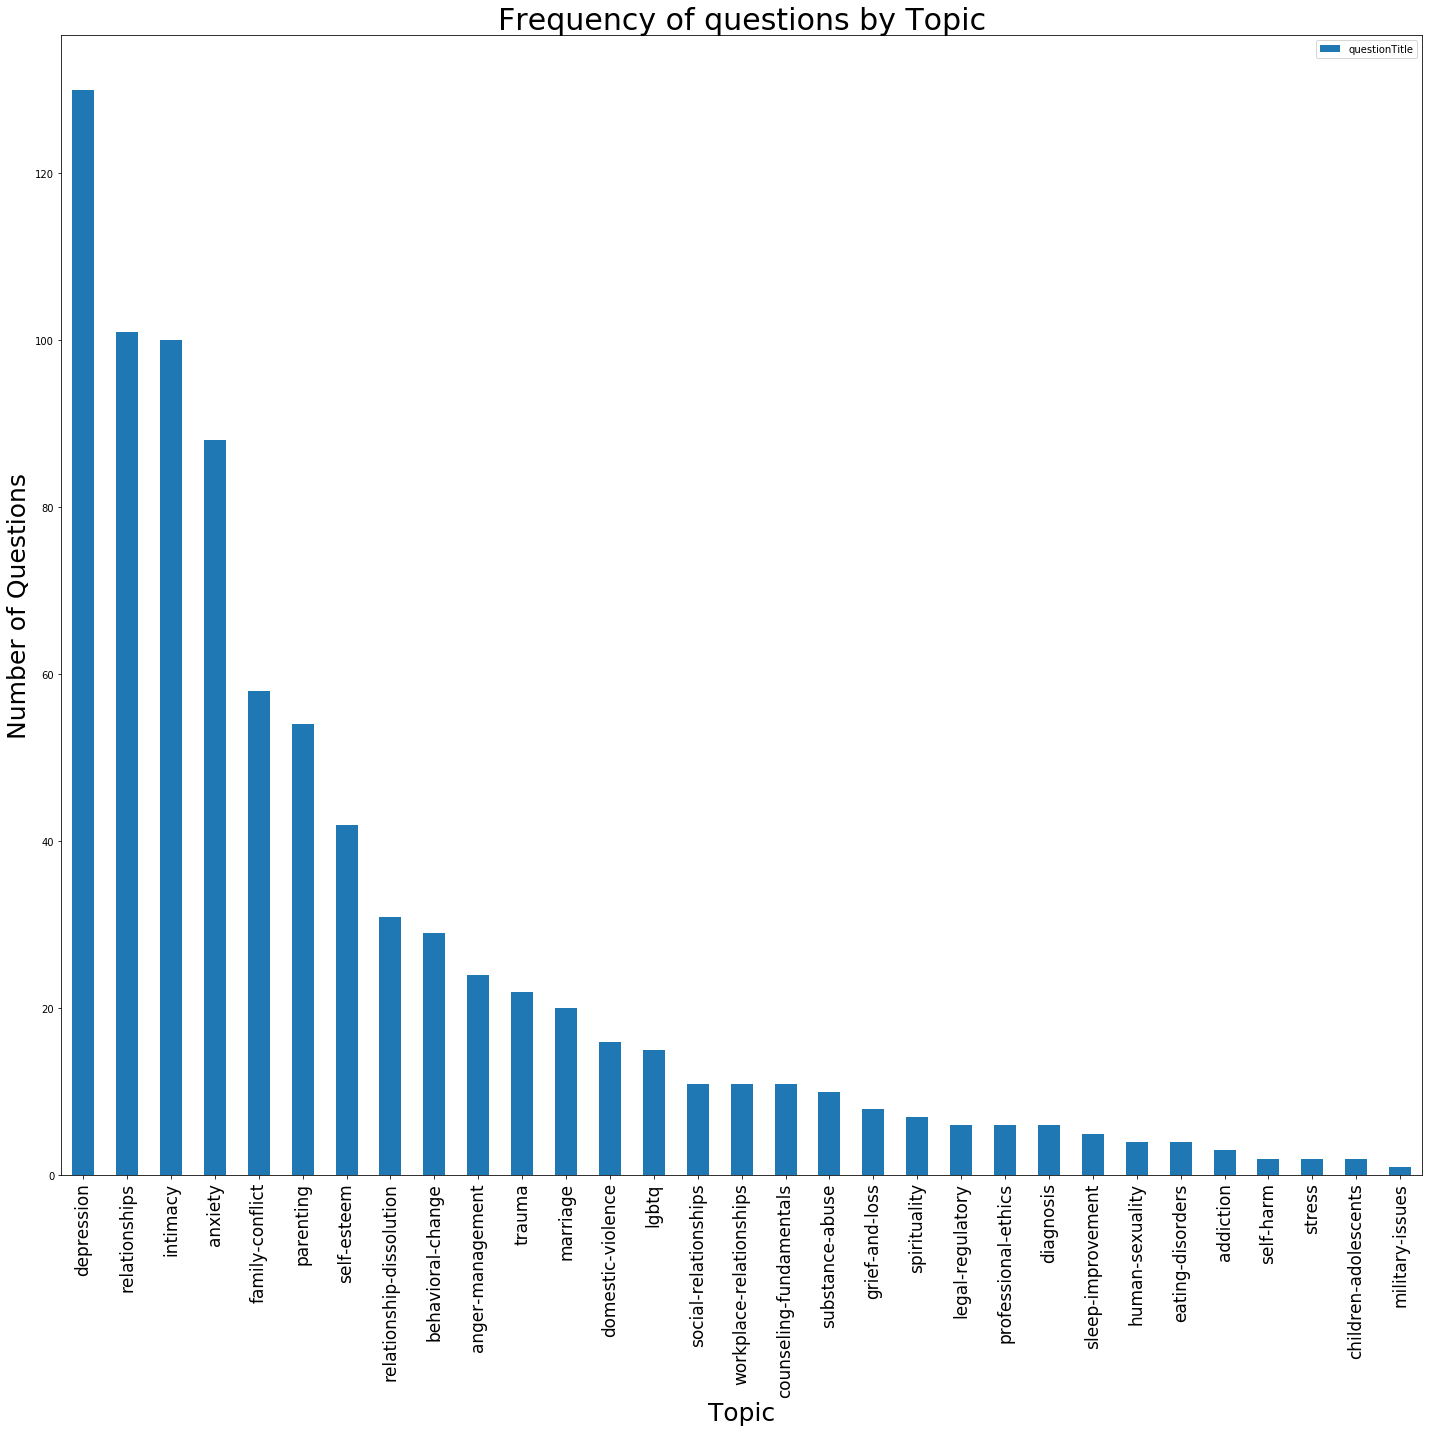

In [205]:
#Frequency of questions by topic
qt=df[['topic','questionTitle']].drop_duplicates()
fig, ax = plt.subplots(figsize=(20, 20))
qt.groupby("topic").agg("count").sort_values("questionTitle",ascending=False).plot.bar(ax=ax)
ax.set_title("Frequency of questions by Topic", fontsize=30)
ax.set_xlabel("Topic", fontsize=25)
ax.set_ylabel("Number of Questions", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
plt.tight_layout()
plt.savefig("figures/Frequency_of_questions_by_topic.png")

In [210]:
#Number of responses per question

dd = df[['questionTitle','answerText']].groupby("questionTitle").agg("count").sort_values("answerText",ascending=False)
dd.columns

Index(['answerText'], dtype='object')

In [194]:
# Average number of responses per question
df[['answerText','questionTitle']].groupby("questionTitle").agg("count").describe()

,answerText
count,818.000000
mean,2.602689
std,5.000107
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,94.000000


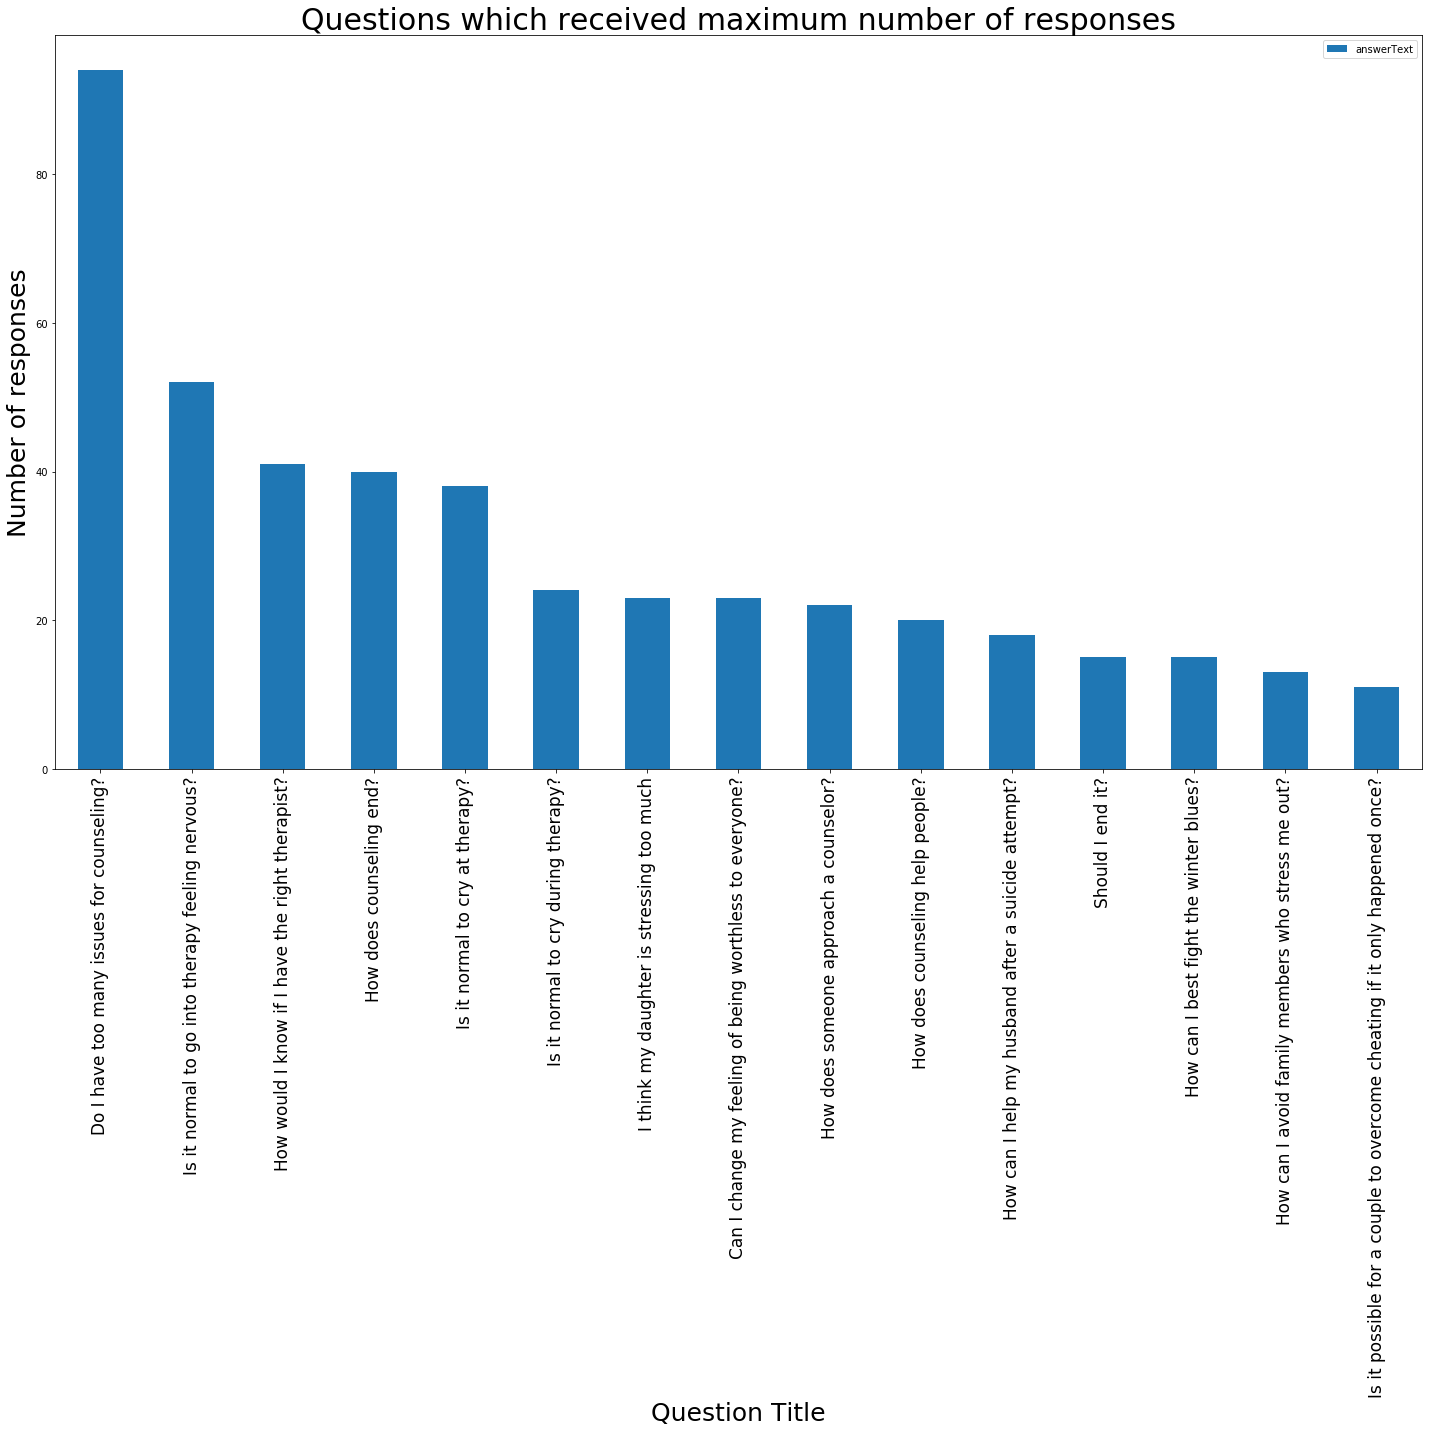

In [199]:
#Questions which received maximum number of responses
fig, ax = plt.subplots(figsize=(20, 20))
df[['questionTitle','answerText']].groupby("questionTitle").agg("count").sort_values("answerText",ascending=False).head(15).plot.bar(ax=ax)
ax.set_title("Questions which received maximum number of responses", fontsize=30)
ax.set_xlabel("Question Title", fontsize=25)
ax.set_ylabel("Number of responses", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
plt.tight_layout()
plt.savefig("figures/Questions_receiving_maximum_number_of_responses.png")

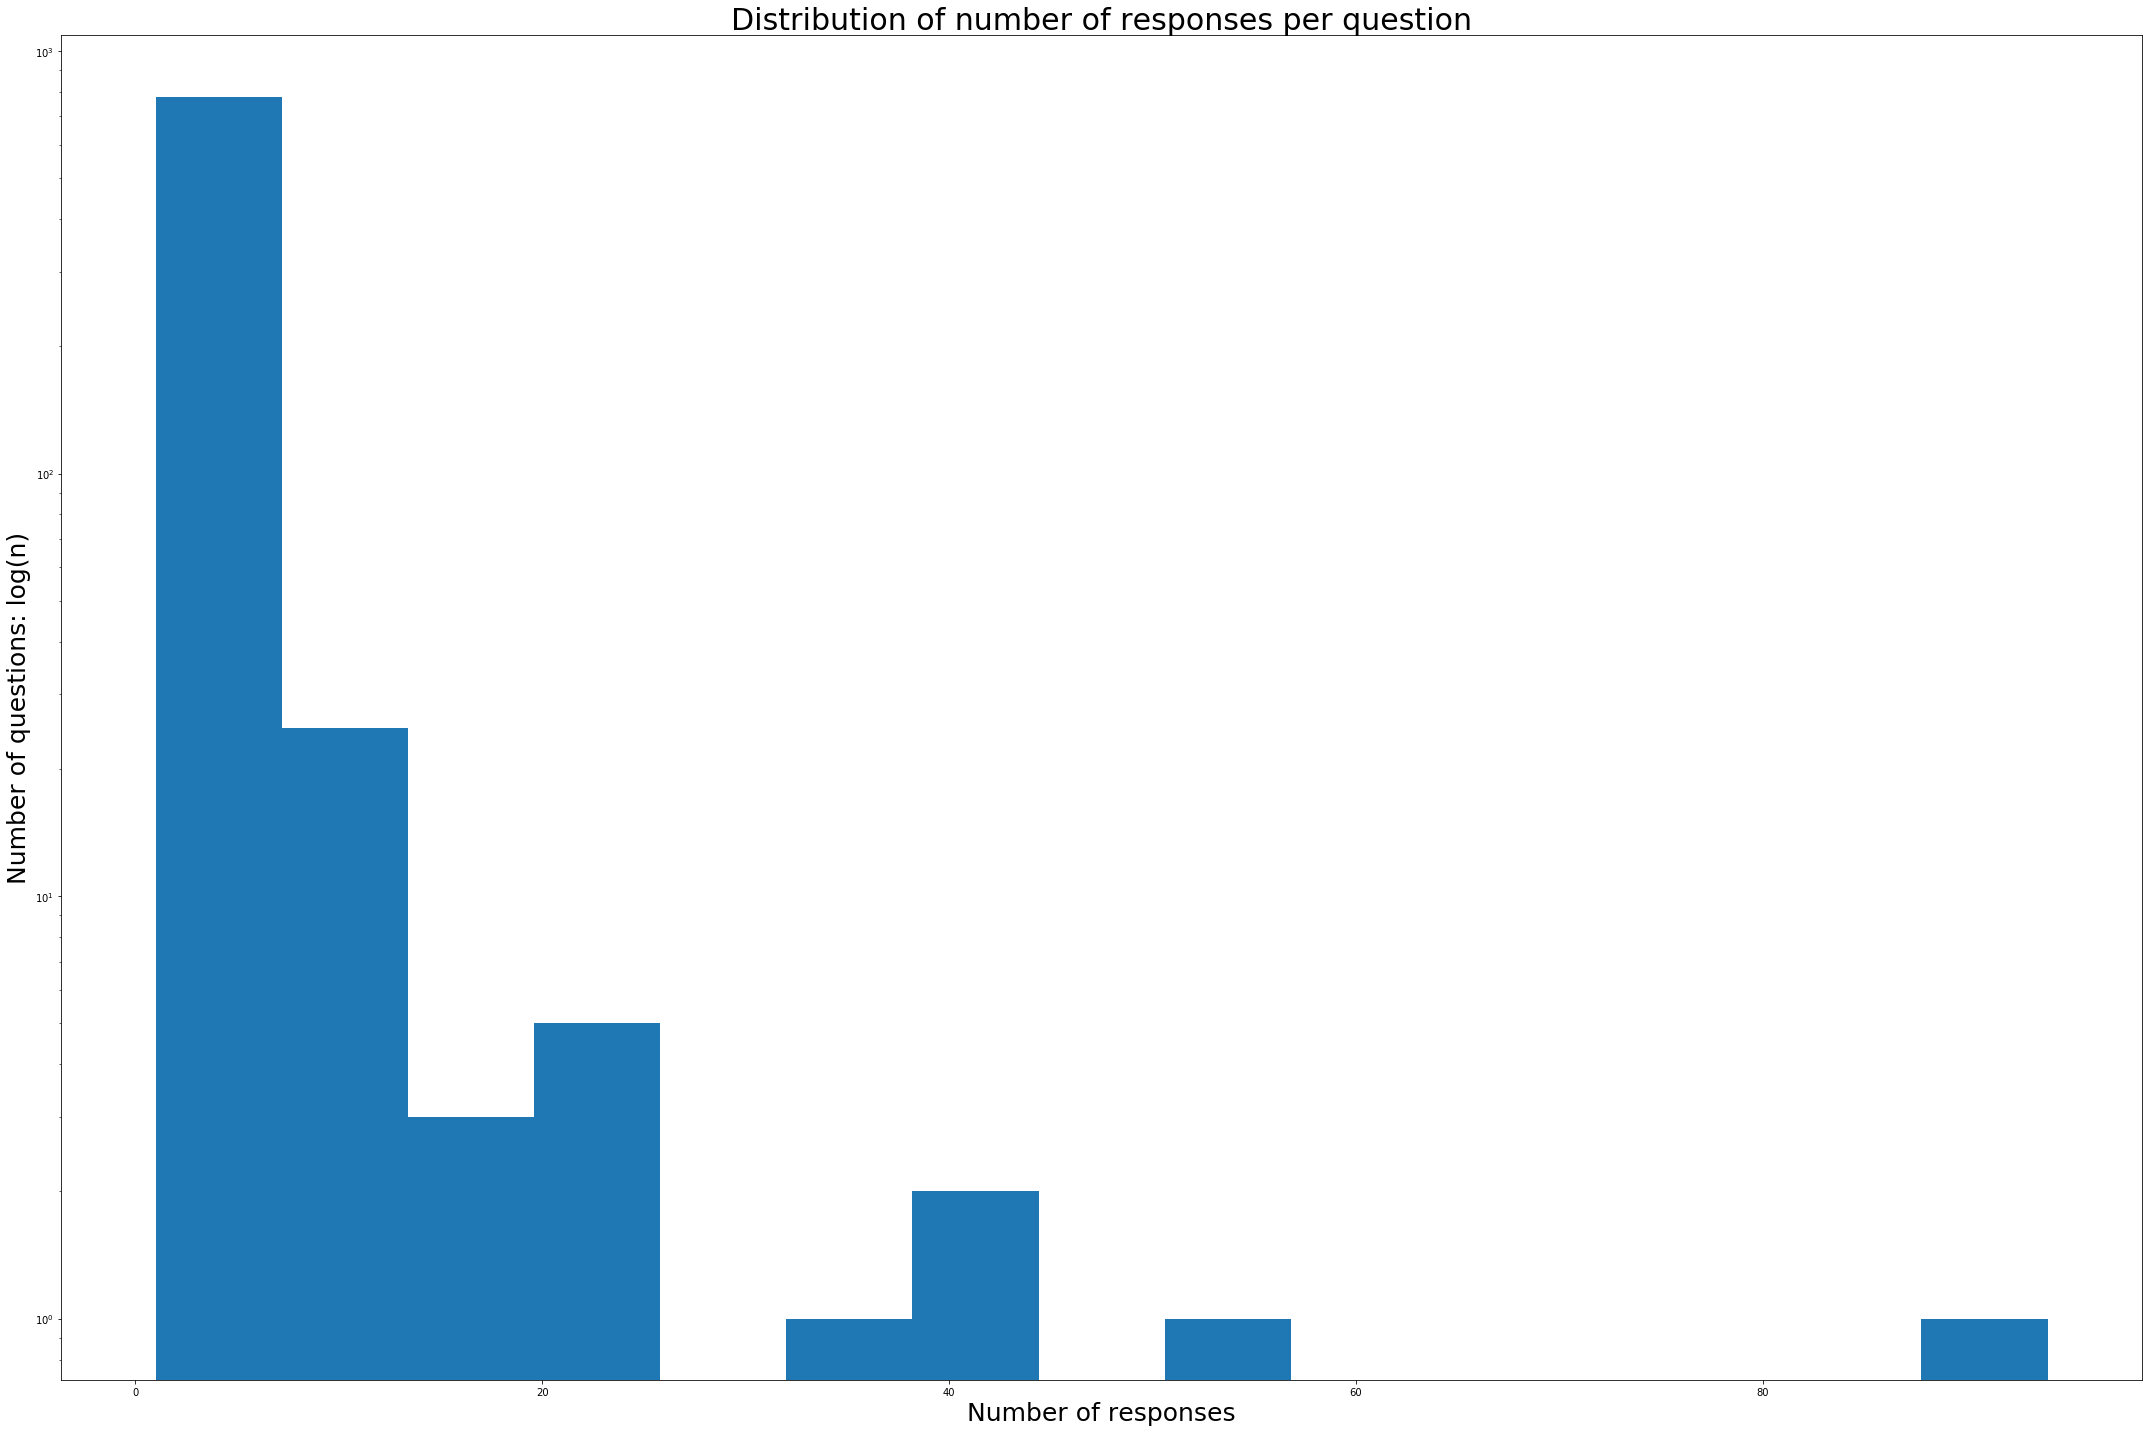

In [238]:
#Distribution of number of responses per question

fig, ax = plt.subplots(figsize=(30, 20))
dd['answerText'].plot.hist(bins=15,ax=ax,logy=True)
ax.set_title("Distribution of number of responses per question", fontsize=30)
ax.set_xlabel("Number of responses", fontsize=25)
ax.set_ylabel("Number of questions: log(n)", fontsize=25)
#ax.set_xticklabels(fontsize=20)
plt.tight_layout()
plt.savefig("figures/Distribution of number of responses per question.png")


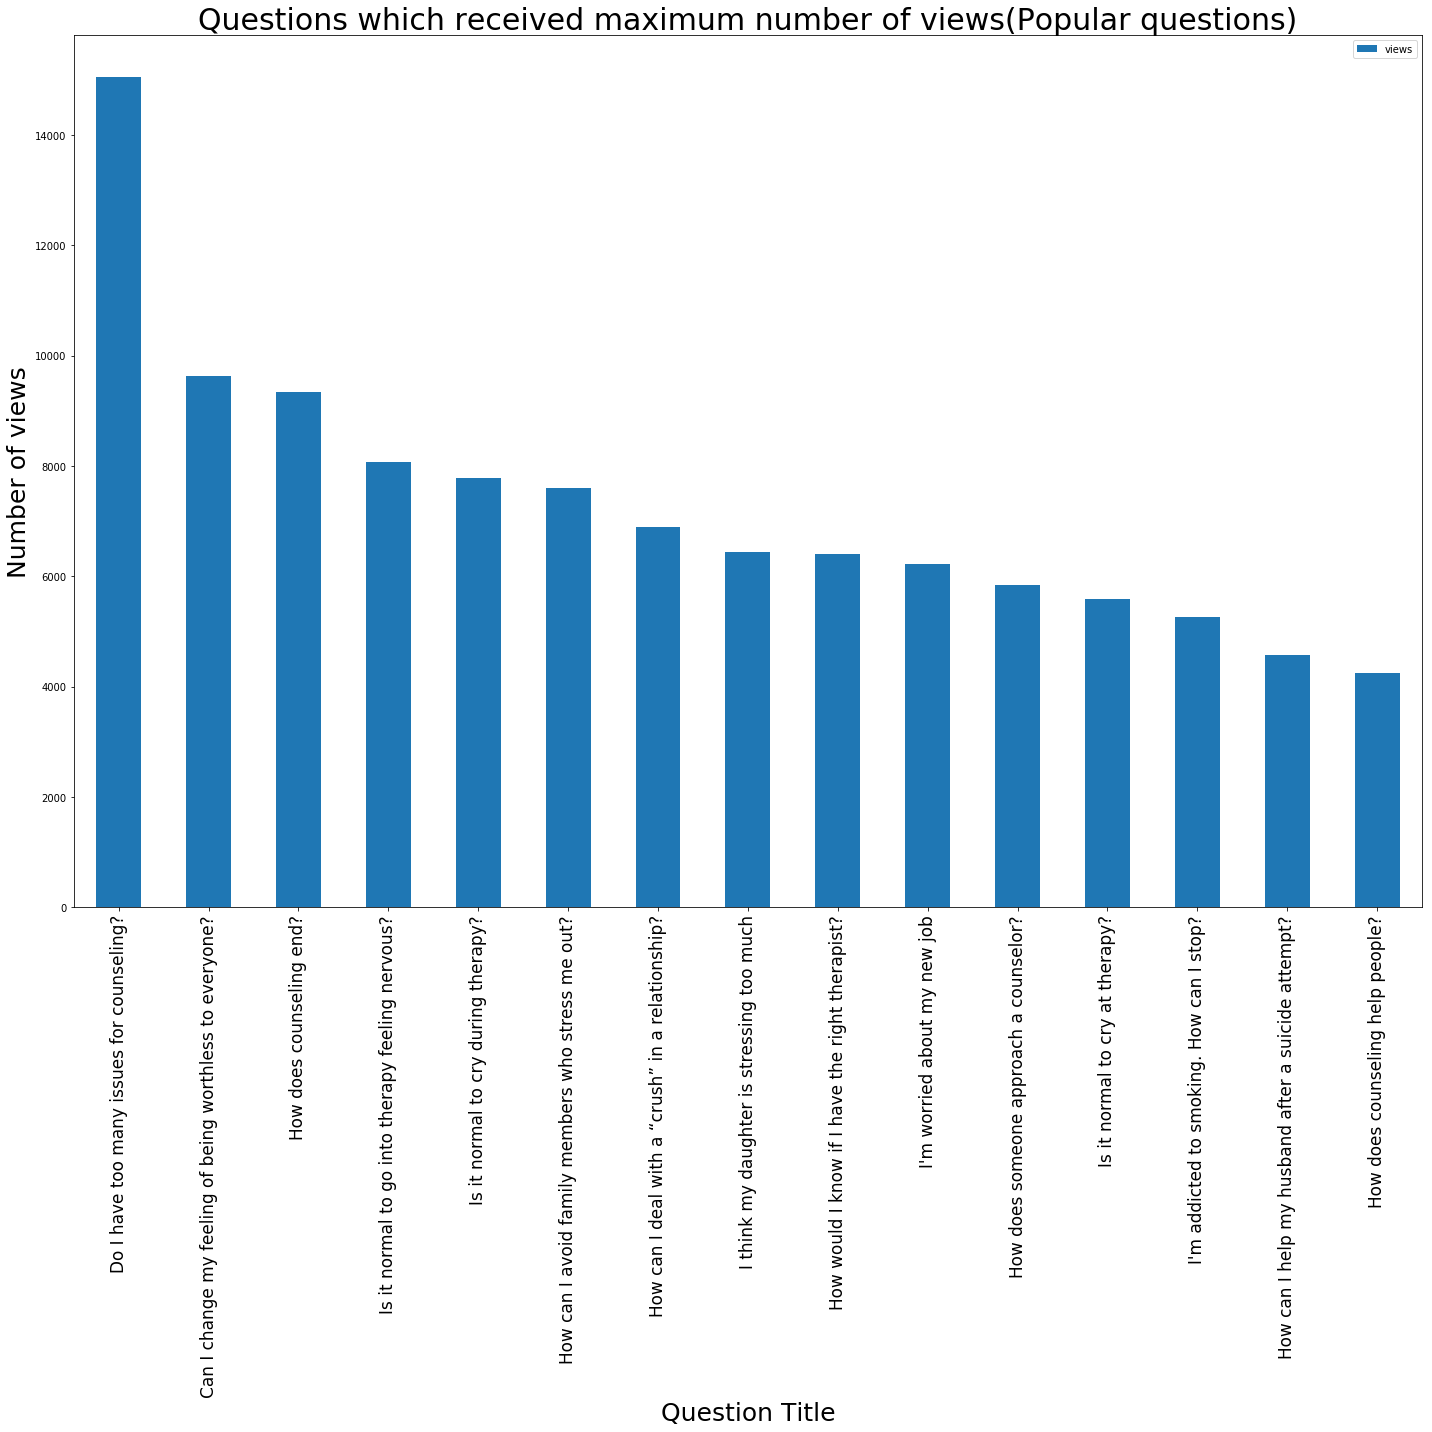

In [188]:
#Questions which received maximum number of views - Most popular questions
fig, ax = plt.subplots(figsize=(20, 20))
df[['questionTitle','views']].groupby("questionTitle").agg("sum").sort_values("views",ascending=False).head(15).plot.bar(ax=ax)
ax.set_title("Questions which received maximum number of views(Popular questions)", fontsize=30)
ax.set_xlabel("Question Title", fontsize=25)
ax.set_ylabel("Number of views", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
plt.tight_layout()
plt.savefig("figures/Questions_receiving_maximum_number_of_views.png")

In [241]:
#Upvotes distribution

dist=df.groupby("answerText",as_index=False)['upvotes'].sum().sort_values("upvotes",ascending=False)
upvotes_dist=pd.merge(df[['questionTitle','topic','answerText']], dist, left_on='answerText', right_on='answerText')
upvotes_dist.sort_values("upvotes",ascending=False).head(15)


,questionTitle,topic,answerText,upvotes
997,Why do I feel like I'm always wrong in everyth...,workplace-relationships,Hello. That must be very frustrating for you t...,9
1683,How can I ask my boyfriend about who he's text...,relationships,I agree with Sherry that in a close intimate r...,9
238,Why do I feel sad all the time?,depression,"Hello,While one can be sad from time to time, ...",9
1688,How can I keep a long distance relationship go...,relationships,Hello. You are asking a very good question abo...,9
146,Why does it feel as if self-harm is an addiction?,depression,"In a way, self-harm can present somewhat like ...",8
147,Why does it feel as if self-harm is an addiction?,self-harm,"In a way, self-harm can present somewhat like ...",8
1851,The Underlying Causes of Being Possessive,behavioral-change,Hi there. It's great you are able to realize t...,7
387,I get depressed whenever anyone I care about i...,depression,"Frequently when working with clients, I utiliz...",6
627,What do I do when I have anxiety attacks?,anxiety,This is a very common question in my practice....,5
294,My husband wants a divorce after I was diagnos...,depression,Wow that is tough. There is nothing worse than...,5


In [242]:
upvotes_dist.describe()

,upvotes
count,2129.000000
mean,0.522781
std,1.010552
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,9.000000
